In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

train_accuracies = []
validation_accuracies = []

train = pd.read_csv('/home/aalmansour/source/lidc_slices/train_accuracies.csv')
val = pd.read_csv('/home/aalmansour/source/lidc_slices/val_accuracies.csv')

In [2]:
test_accuracies = []
test = pd.read_csv('/home/aalmansour/source/lidc_slices/test_accuracies.csv')
for i in range(len(test)):
    accuracy = test.loc[i, 'Accuracy']
    test_accuracies.append(accuracy)
print(test_accuracies)

[0.5963644574912499]


In [3]:
for i in range(len(train)):
    accuracy = train.loc[i, 'Accuracy']
    train_accuracies.append(accuracy)

for i in range(len(val)):
    accuracy = val.loc[i, 'Accuracy']
    validation_accuracies.append(accuracy)

In [4]:
print(train_accuracies)
print(validation_accuracies)

[0.4897406116918312, 0.5555071622144793, 0.6144502516453736, 0.6711188540456833, 0.7198509485094851, 0.759194734804491, 0.7934088269454123, 0.8176054974835463, 0.8417053813395277, 0.8635791715060007, 0.8725319396051103, 0.8794037940379403, 0.8940185830429733, 0.9000677506775068, 0.9089237320944638, 0.9153600464576074, 0.9201025938830816, 0.926296941540844, 0.928474641889276, 0.9355400696864112, 0.9377177700348432, 0.9384436701509872, 0.9442024777390632, 0.9412020905923344, 0.9444928377855208, 0.9498644986449865, 0.9522357723577236, 0.9518970189701896, 0.9548974061169184, 0.9578010065814944, 0.9544134727061556, 0.9554297328687572, 0.9597367402245452, 0.961527293844367, 0.9595915602013164, 0.9622048006194348, 0.9651084010840107, 0.96602787456446, 0.9657375145180024, 0.9646244676732482, 0.9653987611304684, 0.9694154084397988, 0.9696089818041036, 0.9675280681378242, 0.9695121951219512, 0.9703348819202476, 0.969463801780875, 0.9724157955865272, 0.9726577622919086, 0.9729965156794426]
[0.525

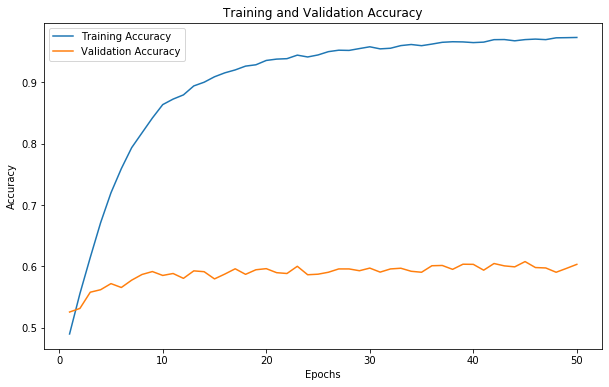

In [5]:
# Create a list of epochs for the x-axis (e.g., [1, 2, 3, 4, 5])
epochs = list(range(1, len(train_accuracies) + 1))

# Plot the training and validation accuracies
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_accuracies,  label='Training Accuracy')
plt.plot(epochs, validation_accuracies,  label='Validation Accuracy')

# Add labels and a legend
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Set custom x-axis ticks and labels
#plt.xticks(epochs)

# Set y-axis labels with only two decimal places
#plt.gca().yaxis.set_major_formatter('{:.2f}'.format)

# Show the plot
#plt.grid(True)
plt.show()

In [6]:
original = pd.read_csv('/home/aalmansour/source/lidc_slices/lidc_files/image_label_mapping.csv')
train_prediction = pd.read_csv('/home/aalmansour/source/lidc_slices/train_predictions.csv')
train_prediction = train_prediction.tail(20664).reset_index(drop=True)
# Rename the column
train_prediction.rename(columns={'Image ID': 'instance_id'}, inplace=True)

In [7]:
len(original)

29523

In [8]:
len(original['nodule_id'].unique())

1332

In [9]:
original['label'].unique()

array([5, 4, 1, 3, 2])

In [10]:
train_prediction['Predicted Label'] = train_prediction['Predicted Label'] + 1
display(train_prediction)

,instance_id,Predicted Label
0,4289,3
1,602,4
2,742,4
3,12770,4
4,7507,1
...,...,...
20659,17908,1
20660,11328,3
20661,23462,1
20662,4753,3


In [12]:
merged_df1 = pd.merge(original, train_prediction, on='instance_id', how='inner')
len(merged_df1)

20664

In [13]:
display(merged_df1)

,nodule_id,instance_id,image,label,agreement,radiologist_id,Predicted Label
0,1,1,/home/aalmansour/source/lidc_slices/crops/1.dcm,5,2,1,5
1,1,2,/home/aalmansour/source/lidc_slices/crops/2.dcm,5,2,1,5
2,1,3,/home/aalmansour/source/lidc_slices/crops/3.dcm,5,2,1,5
3,1,5,/home/aalmansour/source/lidc_slices/crops/5.dcm,5,2,1,5
4,1,6,/home/aalmansour/source/lidc_slices/crops/6.dcm,5,2,1,5
...,...,...,...,...,...,...,...
20659,2690,38018,/home/aalmansour/source/lidc_slices/crops/3801...,5,1,4,5
20660,2690,38019,/home/aalmansour/source/lidc_slices/crops/3801...,5,1,4,5
20661,2690,38021,/home/aalmansour/source/lidc_slices/crops/3802...,5,1,4,5
20662,2690,38023,/home/aalmansour/source/lidc_slices/crops/3802...,5,1,4,5


In [14]:
# Calculate the mean predicted_label for each hum_id within the same img_id group
#mean_predicted_labels = merged_df.groupby(['nodule_id', 'radiologist_id'])['Predicted Label'].mean().reset_index()
mean_predicted_labels1 = merged_df1.groupby(['nodule_id', 'radiologist_id']).agg({
    'label': 'first',
    'agreement': 'first',
    'Predicted Label': 'mean'
}).reset_index()

# Print the result
#print(len(mean_predicted_labels1))

In [15]:
# Calculate accuracy based on true_label and predicted_label
correct_predictions = (mean_predicted_labels1['label'] == round(mean_predicted_labels1['Predicted Label'])).sum()
total_predictions = len(mean_predicted_labels1)

accuracy1 = correct_predictions / total_predictions

# Print the accuracy
#print("Accuracy:", accuracy1)
accuracy1

0.9687964338781575

In [16]:
group_by_nodule_id1 = merged_df1.groupby(['nodule_id'])
# Print the result
print(len(group_by_nodule_id1['nodule_id'].unique()))

1332


In [17]:
group_by_nodule_id1 = merged_df1.groupby(['nodule_id']).agg({
    'label': 'first',
    'agreement': 'first',
    'Predicted Label': 'mean'
}).reset_index()

# Print the result
print(len(group_by_nodule_id1))
display(group_by_nodule_id1)

1332


,nodule_id,label,agreement,Predicted Label
0,1,5,2,5.000000
1,3,5,1,5.000000
2,4,4,1,3.833333
3,5,4,0,4.000000
4,6,1,2,1.083333
...,...,...,...,...
1327,2670,4,1,4.000000
1328,2673,3,1,3.000000
1329,2677,2,1,2.055556
1330,2688,2,1,2.000000


In [18]:
# Calculate accuracy based on true_label and predicted_label
correct_predictions = (group_by_nodule_id1['label'] == round(group_by_nodule_id1['Predicted Label'])).sum()
total_predictions = len(group_by_nodule_id1)

accuracy = correct_predictions / total_predictions

# Print the accuracy
#print("Accuracy:", accuracy)
accuracy

0.990990990990991

In [19]:
val_prediction = pd.read_csv('/home/aalmansour/source/lidc_slices/val_predictions.csv')
val_prediction = val_prediction.tail(4428).reset_index(drop=True)
# Rename the column
val_prediction.rename(columns={'Image ID': 'instance_id'}, inplace=True)
val_prediction.head()

,instance_id,Predicted Label
0,35984,4
1,34004,3
2,8620,3
3,31496,0
4,3699,2


In [20]:
val_prediction['Predicted Label'] = val_prediction['Predicted Label'] + 1
display(val_prediction)

,instance_id,Predicted Label
0,35984,5
1,34004,4
2,8620,4
3,31496,1
4,3699,3
...,...,...
4423,20832,1
4424,4459,5
4425,2583,3
4426,17276,2


In [21]:
merged_df2 = pd.merge(original, val_prediction, on='instance_id', how='inner')
len(merged_df2)

4428

In [22]:
mean_predicted_labels = merged_df2.groupby(['nodule_id', 'radiologist_id']).agg({
    'label': 'first',
    'agreement': 'first',
    'Predicted Label': 'mean'
}).reset_index()

# Print the result
print(len(mean_predicted_labels))

2673


In [23]:
# Calculate accuracy based on true_label and predicted_label
correct_predictions = (mean_predicted_labels['label'] == round(mean_predicted_labels['Predicted Label'])).sum()
total_predictions = len(mean_predicted_labels)

accuracy2 = correct_predictions / total_predictions

# Print the accuracy
#print("Accuracy:", accuracy2)
accuracy2

0.5802469135802469

In [24]:
group_by_nodule_id2 = merged_df2.groupby(['nodule_id']).agg({
    'label': 'first',
    'agreement': 'first',
    'Predicted Label': 'mean'
}).reset_index()

# Print the result
print(len(group_by_nodule_id2))
display(group_by_nodule_id2)

1183


,nodule_id,label,agreement,Predicted Label
0,1,5,2,4.250000
1,3,5,1,4.142857
2,5,4,0,3.400000
3,6,1,2,2.000000
4,7,3,2,3.000000
...,...,...,...,...
1178,2670,4,1,4.000000
1179,2673,3,1,3.000000
1180,2677,2,1,2.000000
1181,2688,2,1,3.000000


In [25]:
# Calculate accuracy based on true_label and predicted_label
correct_predictions = (group_by_nodule_id2['label'] == round(group_by_nodule_id2['Predicted Label'])).sum()
total_predictions = len(group_by_nodule_id2)

accuracy = correct_predictions / total_predictions

# Print the accuracy
#print("Accuracy:", accuracy)
accuracy

0.5748098055790364

In [26]:
test_prediction = pd.read_csv('/home/aalmansour/source/lidc_slices/test_predictions.csv')
test_prediction = test_prediction.tail(4429).reset_index(drop=True)
# Rename the column
test_prediction.rename(columns={'Image ID': 'instance_id'}, inplace=True)
test_prediction.head()
len(test_prediction)

4429

In [27]:
test_prediction['Predicted Label'] = test_prediction['Predicted Label'] + 1
display(test_prediction)

,instance_id,Predicted Label
0,35224,3
1,26756,3
2,5253,1
3,2508,3
4,7983,5
...,...,...
4424,25207,1
4425,9310,5
4426,31316,3
4427,21457,3


In [28]:
merged_df3 = pd.merge(original, test_prediction, on='instance_id', how='inner')
len(merged_df3)

4429

In [29]:
mean_predicted_labels = merged_df3.groupby(['nodule_id', 'radiologist_id']).agg({
    'label': 'first',
    'agreement': 'first',
    'Predicted Label': 'mean'
}).reset_index()

# Print the result
print(len(mean_predicted_labels))

2658


In [30]:
# Calculate accuracy based on true_label and predicted_label
correct_predictions = (mean_predicted_labels['label'] == round(mean_predicted_labels['Predicted Label'])).sum()
total_predictions = len(mean_predicted_labels)

accuracy = correct_predictions / total_predictions

# Print the accuracy
#print("Accuracy:", accuracy)
accuracy

0.5748683220466516

In [31]:
group_by_nodule_id3 = merged_df3.groupby(['nodule_id']).agg({
    'label': 'first',
    'agreement': 'first',
    'Predicted Label': 'mean'
}).reset_index()

# Print the result
print(len(group_by_nodule_id3))
display(group_by_nodule_id3)

1189


,nodule_id,label,agreement,Predicted Label
0,1,5,2,5.000000
1,3,5,1,5.000000
2,4,4,1,3.500000
3,5,4,0,3.250000
4,6,1,2,1.000000
...,...,...,...,...
1184,2670,4,1,4.000000
1185,2673,3,1,3.000000
1186,2677,2,1,2.400000
1187,2688,2,1,2.000000


In [32]:
# Calculate accuracy based on true_label and predicted_label
correct_predictions = (group_by_nodule_id3['label'] == round(group_by_nodule_id3['Predicted Label'])).sum()
total_predictions = len(group_by_nodule_id3)

accuracy = correct_predictions / total_predictions

# Print the accuracy
#print("Accuracy:", accuracy)
accuracy

0.5643397813288478

In [33]:
train_uncert = []
validation_uncert = []
test_uncert = []

train_un = pd.read_csv('/home/aalmansour/source/lidc_slices/train_uncertainty_stats.csv')
train_un.rename(columns={'Image_ID': 'instance_id'}, inplace=True)
val_un = pd.read_csv('/home/aalmansour/source/lidc_slices/val_uncertainty_stats.csv')
val_un.rename(columns={'Image_ID': 'instance_id'}, inplace=True)
test_un = pd.read_csv('/home/aalmansour/source/lidc_slices/test_uncertainty_stats.csv')
test_un.rename(columns={'Image_ID': 'instance_id'}, inplace=True)

FileNotFoundError: [Errno 2] No such file or directory: '/home/aalmansour/source/lidc_slices/train_uncertainty_stats.csv'

In [34]:
display(train_un)

,instance_id,True_Label,Mean_Prediction,Prediction_STD,Difference_T-P,all_sample_predictions_std,all_sample_predictions100
0,39060,5,5.00,0.000000,0.00,0.000000,"[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ..."
1,38223,5,4.99,0.099499,0.01,0.099499,"[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ..."
2,38750,4,3.98,0.198997,0.02,0.198997,"[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ..."
3,31944,3,3.00,0.000000,0.00,0.000000,"[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ..."
4,18780,4,4.00,0.000000,0.00,0.000000,"[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ..."
...,...,...,...,...,...,...,...
20659,10339,4,4.00,0.000000,0.00,0.000000,"[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ..."
20660,13839,3,2.98,0.198997,0.02,0.198997,"[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ..."
20661,30836,3,3.00,0.000000,0.00,0.000000,"[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ..."
20662,2321,3,3.00,0.000000,0.00,0.000000,"[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ..."


In [35]:
print(type(train_un['all_sample_predictions100'][0]))

<class 'str'>


In [36]:
import ast
# Convert the strings to lists of integers
train_un['all_sample_predictions100'] = train_un['all_sample_predictions100'].apply(ast.literal_eval)

# Concatenate the lists into one list
all_predictions = [value for sublist in train_un['all_sample_predictions100'] for value in sublist]

# Calculate the mean and standard deviation of all predictions
mean_predictions = np.mean(all_predictions)
std_predictions = np.std(all_predictions)
median_predictions = np.median(all_predictions)

# Print the results
#print("Mean of All Predictions:", mean_predictions)
#print("Standard Deviation of All Predictions:", std_predictions)

In [37]:
mean_predictions

3.3070436507936507

In [38]:
median_predictions

3.0

In [39]:
std_predictions

1.2189499123120926

In [40]:
# Convert the strings to lists of integers
val_un['all_sample_predictions100'] = val_un['all_sample_predictions100'].apply(ast.literal_eval)

# Concatenate the lists into one list
all_predictions = [value for sublist in val_un['all_sample_predictions100'] for value in sublist]

# Calculate the mean and standard deviation of all predictions
mean_predictions = np.mean(all_predictions)
std_predictions = np.std(all_predictions)
median_predictions = np.median(all_predictions)

# Print the results
print("Mean of All Predictions:", mean_predictions)
print("Standard Deviation of All Predictions:", std_predictions)

Mean of All Predictions: 3.3226648599819333
Standard Deviation of All Predictions: 1.20487467390683


In [41]:
mean_predictions

3.3226648599819333

In [42]:
std_predictions

1.20487467390683

In [43]:
median_predictions

3.0

In [44]:
# Convert the strings to lists of integers
test_un['all_sample_predictions100'] = test_un['all_sample_predictions100'].apply(ast.literal_eval)

# Concatenate the lists into one list
all_predictions = [value for sublist in test_un['all_sample_predictions100'] for value in sublist]

# Calculate the mean and standard deviation of all predictions
mean_predictions = np.mean(all_predictions)
std_predictions = np.std(all_predictions)
median_predictions = np.median(all_predictions)                        

# Print the results
print("Mean of All Predictions:", mean_predictions)
print("Standard Deviation of All Predictions:", std_predictions)

Mean of All Predictions: 3.3560803793181306
Standard Deviation of All Predictions: 1.184851394917967


In [45]:
mean_predictions

3.3560803793181306

In [46]:
std_predictions

1.184851394917967

In [47]:
median_predictions 

3.0

In [48]:
merged_train_un = pd.merge(original, train_un, on='instance_id', how='inner')
display(merged_train_un)

,nodule_id,instance_id,image,label,agreement,radiologist_id,True_Label,Mean_Prediction,Prediction_STD,Difference_T-P,all_sample_predictions_std,all_sample_predictions100
0,1,1,/home/aalmansour/source/lidc_slices/crops/1.dcm,5,2,1,5,5.00,0.000000,0.00,0.000000,"[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ..."
1,1,2,/home/aalmansour/source/lidc_slices/crops/2.dcm,5,2,1,5,5.00,0.000000,0.00,0.000000,"[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ..."
2,1,3,/home/aalmansour/source/lidc_slices/crops/3.dcm,5,2,1,5,5.00,0.000000,0.00,0.000000,"[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ..."
3,1,5,/home/aalmansour/source/lidc_slices/crops/5.dcm,5,2,1,5,5.00,0.000000,0.00,0.000000,"[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ..."
4,1,6,/home/aalmansour/source/lidc_slices/crops/6.dcm,5,2,1,5,4.95,0.409268,0.05,0.409268,"[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
20659,2690,38018,/home/aalmansour/source/lidc_slices/crops/3801...,5,1,4,5,5.00,0.000000,0.00,0.000000,"[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ..."
20660,2690,38019,/home/aalmansour/source/lidc_slices/crops/3801...,5,1,4,5,5.00,0.000000,0.00,0.000000,"[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ..."
20661,2690,38021,/home/aalmansour/source/lidc_slices/crops/3802...,5,1,4,5,5.00,0.000000,0.00,0.000000,"[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ..."
20662,2690,38023,/home/aalmansour/source/lidc_slices/crops/3802...,5,1,4,5,5.00,0.000000,0.00,0.000000,"[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ..."


In [49]:
# Create a cross-tabulation table showing mean and std for each combination of 'agreement' and 'label'
cross_tab = pd.crosstab(merged_train_un['label'],merged_train_un['agreement'])

# Print the cross-tabulation table
print(cross_tab)

agreement     0     1     2     3
label                            
1             0   342   784  1114
2           160  1592   261    24
3          1165  4207  1955   232
4          1398  2751   496     0
5             0  2611  1374   198


In [50]:
# Calculate mean and std separately
mean_table = pd.pivot_table(merged_train_un, values='Mean_Prediction', index='label', columns='agreement', aggfunc='mean')
std_table = pd.pivot_table(merged_train_un, values='Prediction_STD', index='label', columns='agreement', aggfunc='mean')

# Print the mean and std tables
print("Mean Table:")
print(mean_table)

print("\nStd Table:")
print(std_table)

Mean Table:
agreement         0         1         2         3
label                                            
1               NaN  1.048216  1.036033  1.031266
2          2.011500  2.020132  2.021992  1.996667
3          2.991725  2.986247  2.986583  3.001552
4          3.980193  3.977343  3.979153       NaN
5               NaN  4.979157  4.985553  4.998131

Std Table:
agreement         0         1         2         3
label                                            
1               NaN  0.173912  0.124521  0.114491
2          0.166520  0.140754  0.168253  0.226071
3          0.113978  0.125913  0.124804  0.106887
4          0.084060  0.097566  0.098690       NaN
5               NaN  0.063718  0.043712  0.007977


In [51]:
merged_val_un = pd.merge(original, val_un, on='instance_id', how='inner')
display(merged_val_un)

,nodule_id,instance_id,image,label,agreement,radiologist_id,True_Label,Mean_Prediction,Prediction_STD,Difference_T-P,all_sample_predictions_std,all_sample_predictions100
0,1,4,/home/aalmansour/source/lidc_slices/crops/4.dcm,5,2,1,5,4.01,0.099499,0.99,0.099499,"[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ..."
1,1,8,/home/aalmansour/source/lidc_slices/crops/8.dcm,5,2,1,5,4.24,0.427083,0.76,0.427083,"[5, 4, 4, 4, 5, 5, 4, 4, 4, 5, 4, 4, 4, 5, 4, ..."
2,1,24,/home/aalmansour/source/lidc_slices/crops/24.dcm,5,2,4,5,3.18,0.572364,1.82,0.572364,"[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ..."
3,1,31,/home/aalmansour/source/lidc_slices/crops/31.dcm,5,2,4,5,5.00,0.000000,0.00,0.000000,"[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ..."
4,3,106,/home/aalmansour/source/lidc_slices/crops/106.dcm,5,1,2,5,4.97,0.170587,0.03,0.170587,"[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
4423,2690,37986,/home/aalmansour/source/lidc_slices/crops/3798...,5,1,3,5,3.92,0.416653,1.08,0.416653,"[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, ..."
4424,2690,37987,/home/aalmansour/source/lidc_slices/crops/3798...,5,1,3,5,4.02,0.140000,0.98,0.140000,"[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, ..."
4425,2690,37996,/home/aalmansour/source/lidc_slices/crops/3799...,5,1,3,5,5.00,0.000000,0.00,0.000000,"[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ..."
4426,2690,38015,/home/aalmansour/source/lidc_slices/crops/3801...,5,1,4,5,5.00,0.000000,0.00,0.000000,"[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ..."


In [88]:
merged_test_un = pd.merge(original, test_un, on='instance_id', how='inner')
display(merged_test_un)

,nodule_id,instance_id,image,label,agreement,radiologist_id,True_Label,Mean_Prediction,Prediction_STD,Difference_T-P,all_sample_predictions_std,all_sample_predictions100
0,1,7,/home/aalmansour/source/lidc_slices/crops/7.dcm,5,2,1,5,5.00,0.000000,0.00,0.000000,"[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ..."
1,1,18,/home/aalmansour/source/lidc_slices/crops/18.dcm,5,2,3,5,5.00,0.000000,0.00,0.000000,"[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ..."
2,1,30,/home/aalmansour/source/lidc_slices/crops/30.dcm,5,2,4,5,5.00,0.000000,0.00,0.000000,"[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ..."
3,3,88,/home/aalmansour/source/lidc_slices/crops/88.dcm,5,1,1,5,5.00,0.000000,0.00,0.000000,"[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ..."
4,3,89,/home/aalmansour/source/lidc_slices/crops/89.dcm,5,1,1,5,5.00,0.000000,0.00,0.000000,"[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
4424,2690,38006,/home/aalmansour/source/lidc_slices/crops/3800...,5,1,4,5,4.50,0.866025,0.50,0.866025,"[5, 5, 5, 5, 3, 5, 5, 5, 3, 5, 5, 3, 5, 5, 5, ..."
4425,2690,38007,/home/aalmansour/source/lidc_slices/crops/3800...,5,1,4,5,3.00,0.000000,2.00,0.000000,"[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ..."
4426,2690,38010,/home/aalmansour/source/lidc_slices/crops/3801...,5,1,4,5,5.00,0.000000,0.00,0.000000,"[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ..."
4427,2690,38011,/home/aalmansour/source/lidc_slices/crops/3801...,5,1,4,5,4.85,0.357071,0.15,0.357071,"[5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, ..."


In [98]:
# Assuming you have a DataFrame named 'test'

# Define the conditions for row selection
label_condition = merged_test_un['label'] == 5  # Replace with the desired 'label' value
agreement_condition = merged_test_un['agreement'] == 3  # Replace with the desired 'agreement' value

# Apply the conditions to filter rows
filtered_rows = merged_test_un[label_condition & agreement_condition]

# Access all columns and values from the filtered rows
filtered_values = filtered_rows.values

# Print the filtered values
print("Filtered Values:")
print(filtered_values[0][2])

Filtered Values:
/home/aalmansour/source/lidc_slices/crops/11941.dcm


In [53]:
# Define a custom aggregation function to collect all lists
def collect_lists(series):
    all_lists = [sublist for sublist in series]
    return all_lists

# Group by 'nodule_id' and 'radiologist_id', apply the custom aggregation function
result_lists = merged_train_un.groupby(['nodule_id', 'radiologist_id'])['all_sample_predictions100'].agg(collect_lists).reset_index()

# Define a function to calculate mean and std for each group
def calculate_mean_std(series):
    flat_values = [value for sublist in series for value in sublist]
    return np.mean(flat_values), np.std(flat_values)

# Apply the calculation to the collected lists
result_stats = result_lists['all_sample_predictions100'].apply(calculate_mean_std)

# Concatenate the calculated mean and std as a new DataFrame
result_stats_df = pd.DataFrame(list(result_stats), columns=['Mean_Predictions', 'Std_Predictions'])

# Merge the original DataFrame with the calculated statistics
result = pd.concat([result_lists, result_stats_df], axis=1)

# Print the result
print(result)

      nodule_id  radiologist_id  \
0             1               1   
1             1               2   
2             1               3   
3             1               4   
4             3               1   
...         ...             ...   
4706       2688               4   
4707       2690               1   
4708       2690               2   
4709       2690               3   
4710       2690               4   

                              all_sample_predictions100  Mean_Predictions  \
0     [[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,...          4.990000   
1     [[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,...          5.000000   
2     [[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,...          5.000000   
3     [[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,...          5.000000   
4     [[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,...          5.000000   
...                                                 ...               ...   
4706  [[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [54]:
len(result['all_sample_predictions100'])

4711

In [60]:
# Define a custom aggregation function to calculate mean and std for lists
def calculate_mean_std(x):
    return np.mean(x.tolist()), np.median(x.tolist()), np.std(x.tolist())

In [61]:
# Create a cross-tabulation table
cross_tab = pd.crosstab(merged_train_un['label'], merged_train_un['agreement'])

display(cross_tab)

agreement,0,1,2,3
label,,,,
1,0,342,784,1114
2,160,1592,261,24
3,1165,4207,1955,232
4,1398,2751,496,0
5,0,2611,1374,198


In [62]:
# Use pd.pivot_table to calculate the mean and std
result_table = pd.pivot_table(merged_train_un, values='all_sample_predictions100', index='label', columns='agreement', aggfunc=calculate_mean_std)

# Print the result table
display(result_table)


agreement,0,1,2,3
label,,,,
1,NaN,"(1.0482163742690058, 1.0, 0.3586643187341792)","(1.0360331632653061, 1.0, 0.2834104957553257)","(1.0312657091561939, 1.0, 0.27312444364176336)"
2,"(2.0115, 2.0, 0.2507344212508526)","(2.0201319095477386, 2.0, 0.24666719728809028)","(2.021992337164751, 2.0, 0.29330827991674174)","(1.9966666666666666, 2.0, 0.32401988965013995)"
3,"(2.991725321888412, 3.0, 0.21644857273212018)","(2.986246731637747, 3.0, 0.23563267246481723)","(2.9865831202046036, 3.0, 0.23690035377323904)","(3.001551724137931, 3.0, 0.18568885473525173)"
4,"(3.9801931330472105, 4.0, 0.22941978793137235)","(3.9773427844420213, 4.0, 0.23619867287842217)","(3.9791532258064515, 4.0, 0.25575806184609623)",NaN
5,NaN,"(4.979157410953658, 5.0, 0.22207350071125828)","(4.985553129548763, 5.0, 0.18888940261522597)","(4.998131313131313, 5.0, 0.04971172380972391)"


In [63]:
# Create a cross-tabulation table
cross_tab = pd.crosstab(merged_val_un['label'], merged_val_un['agreement'])

print(cross_tab)

agreement    0    1    2    3
label                        
1            0   68  188  257
2           33  345   60    5
3          254  896  404   50
4          294  563   93    0
5            0  564  309   45


In [64]:
# Use pd.pivot_table to calculate the mean and std
result_table = pd.pivot_table(merged_val_un, values='all_sample_predictions100', index='label', columns='agreement', aggfunc=calculate_mean_std)

# Print the result table
display(result_table)

agreement,0,1,2,3
label,,,,
1,NaN,"(2.3341176470588234, 3.0, 1.3466125641489743)","(1.9912765957446807, 1.0, 1.202005623630553)","(1.8480933852140078, 1.0, 1.172462183204959)"
2,"(2.9357575757575756, 3.0, 0.9551107513221139)","(2.6446666666666667, 3.0, 0.9936460260680224)","(2.502666666666667, 3.0, 0.8744481434342208)","(2.536, 3.0, 0.8675851543220413)"
3,"(3.0866141732283463, 3.0, 0.872354241122174)","(3.011953125, 3.0, 0.8961362886317764)","(2.997351485148515, 3.0, 0.7663517244497471)","(3.139, 3.0, 0.689694860064942)"
4,"(3.8627891156462586, 4.0, 0.8838400156220945)","(3.7865541740674957, 4.0, 0.8669173404247452)","(3.7616129032258065, 4.0, 0.798149459583546)",NaN
5,NaN,"(4.386578014184397, 5.0, 0.9023063391827578)","(4.447313915857605, 5.0, 0.8770210511216684)","(4.809555555555556, 5.0, 0.531619979373552)"


In [71]:
# Create a cross-tabulation table
cross_tab = pd.crosstab(merged_test_un['label'], merged_test_un['agreement'])

print(cross_tab)

agreement    0    1    2    3
label                        
1            0   74  183  226
2           33  342   71   10
3          252  895  416   39
4          298  575   88    0
5            0  601  290   36


In [82]:
# Access a specific cell in the cross-tabulation
cell_value = cross_tab.loc[5, 3]
print(cell_value)

36


In [66]:
# Use pd.pivot_table to calculate the mean and std
result_table = pd.pivot_table(merged_test_un, values='all_sample_predictions100', index='label', columns='agreement', aggfunc=calculate_mean_std)

# Print the result table
display(result_table)

agreement,0,1,2,3
label,,,,
1,NaN,"(2.4798648648648647, 3.0, 1.2970340315642426)","(2.0289071038251367, 2.0, 1.1482395206727478)","(1.9397787610619468, 1.0, 1.197509193967797)"
2,"(2.8475757575757576, 3.0, 1.0879965750364715)","(2.6524269005847954, 3.0, 0.9471316897026155)","(2.4961971830985914, 2.0, 0.9653793915189665)","(2.771, 3.0, 0.8755335516129579)"
3,"(3.159920634920635, 3.0, 0.9498019810597331)","(3.0564245810055866, 3.0, 0.8650188480261379)","(2.995216346153846, 3.0, 0.7768286127447657)","(3.2005128205128206, 3.0, 0.683355029241375)"
4,"(3.8606040268456376, 4.0, 0.8585329520655816)","(3.775304347826087, 4.0, 0.8378121837252592)","(3.673409090909091, 4.0, 0.8906954463222396)",NaN
5,NaN,"(4.407870216306156, 5.0, 0.9164504827408444)","(4.485241379310345, 5.0, 0.8978073541602922)","(4.6625, 5.0, 0.6881814804250401)"


In [67]:
# Concatenate them vertically
stacked_df = pd.concat([merged_train_un, merged_val_un, merged_test_un], axis=0)

# Reset the index if needed
stacked_df.reset_index(drop=True, inplace=True)

# Print the stacked DataFrame
print(stacked_df)

       nodule_id  instance_id  \
0              1            1   
1              1            2   
2              1            3   
3              1            5   
4              1            6   
...          ...          ...   
29516       2690        38006   
29517       2690        38007   
29518       2690        38010   
29519       2690        38011   
29520       2690        38022   

                                                   image  label  agreement  \
0        /home/aalmansour/source/lidc_slices/crops/1.dcm      5          2   
1        /home/aalmansour/source/lidc_slices/crops/2.dcm      5          2   
2        /home/aalmansour/source/lidc_slices/crops/3.dcm      5          2   
3        /home/aalmansour/source/lidc_slices/crops/5.dcm      5          2   
4        /home/aalmansour/source/lidc_slices/crops/6.dcm      5          2   
...                                                  ...    ...        ...   
29516  /home/aalmansour/source/lidc_slices/crops/3800... 

In [68]:
# Create a cross-tabulation table
cross_tab = pd.crosstab(stacked_df['label'], stacked_df['agreement'])

print(cross_tab)

agreement     0     1     2     3
label                            
1             0   484  1155  1597
2           226  2279   392    39
3          1671  5998  2775   321
4          1990  3889   677     0
5             0  3776  1973   279


In [69]:
# Use pd.pivot_table to calculate the mean and std
result_table = pd.pivot_table(stacked_df, values='all_sample_predictions100', index='label', columns='agreement', aggfunc=calculate_mean_std)

# Print the result table
display(result_table)

agreement,0,1,2,3
label,,,,
1,NaN,"(1.4477685950413224, 1.0, 0.9944469683688649)","(1.348831168831169, 1.0, 0.8399216218215815)","(1.2912836568566062, 1.0, 0.7954632903386685)"
2,"(2.2685398230088496, 2.0, 0.7150478607089134)","(2.209561211057481, 2.0, 0.640112176575893)","(2.181454081632653, 2.0, 0.6275217923963438)","(2.2643589743589745, 2.0, 0.6906789482812894)"
3,"(3.031514063435069, 3.0, 0.5370645603301364)","(3.000558519506502, 3.0, 0.5207575420793119)","(2.989445045045045, 3.0, 0.46424630204443723)","(3.047133956386293, 3.0, 0.4017751236306936)"
4,"(3.9449396984924623, 4.0, 0.515458054951108)","(3.91985086140396, 4.0, 0.5099467080238176)","(3.9095273264401773, 4.0, 0.502355674938069)",NaN
5,NaN,"(4.799719279661017, 5.0, 0.6013173440993826)","(4.8277192093259, 5.0, 0.5666030756472987)","(4.924408602150538, 5.0, 0.35111587309857356)"
